## Feature extraction: redness and elongation

In this worksheet, you will implement the extraction of the redness and elongation features of the images.

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

code_dir = './code'
from sys import path; path.append(code_dir); 
from utilities import *
from my_utilities import *

In [3]:
data_dir = './mini-dataset'
a_images = get_images(data_dir, 'a*.png')
b_images = get_images(data_dir, 'b*.png')
images = a_images + b_images
cropped_images = [crop_image(img) for img in images]

### Exercise: Extraction of the `redness` feature
1. Implement the following little function that extracts the `redness` as the average (mean) of `D` for the foreground pixels (those that are `True` in `F`).<br>
   **Hint**: use `difference_filter` and `foreground_filter`.

In [4]:
def get_redness(img):
    '''Extract the scalar value redness from a PIL image.'''
    ### BEGIN SOLUTION
    D = difference_filter(img)
    F = foreground_filter(img)
    return np.mean(D[F])
    ### END SOLUTION

2. Check the redness of the images below, and make sure the results make sense to you:

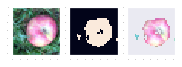

33.86363636363637


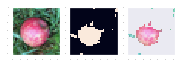

49.52542372881356


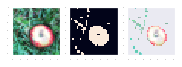

6.371508379888268


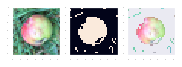

20.037366548042705


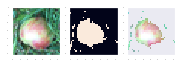

11.083018867924528


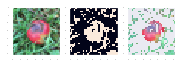

2.503225806451613


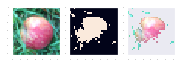

28.25769230769231


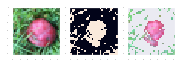

15.979522184300341


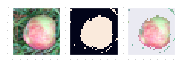

38.712201591511935


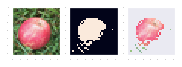

79.36206896551724


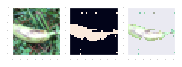

-4.740641711229946


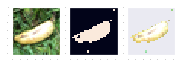

29.210526315789473


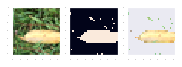

47.95663265306123


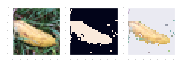

49.132


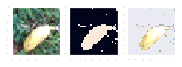

23.417098445595855


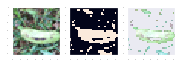

-19.04296875


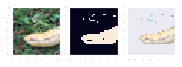

23.207253886010363


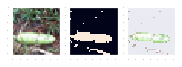

-1.0789473684210527


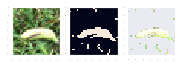

13.437037037037037


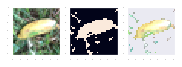

19.928571428571427


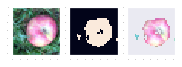

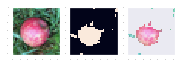

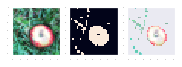

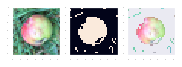

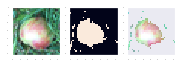

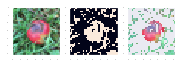

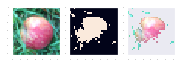

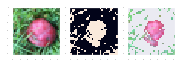

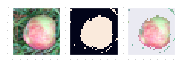

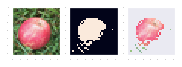

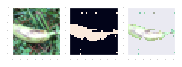

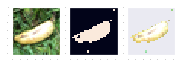

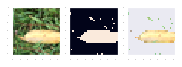

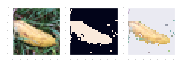

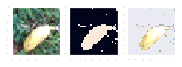

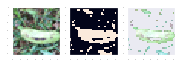

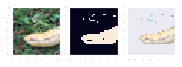

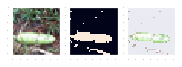

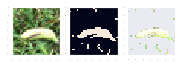

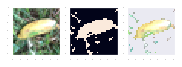

In [25]:
for img in cropped_images:
    fig = show_images([img, foreground_filter(img), transparent_background_filter(img)])
    display(fig)
    print(get_redness(img))

### Exercise: extraction of the `elongation` feature
As can be seen from the results of question 4.4, the foreground that we extracted is rather noisy. Therefore, jst looking at the bounding box as we did last time won't work:

So, we need to find something else. The first idea that comes to mind is to "denoise" the background. But this can be pretty difficult. Also, if we keep using the same method as last time, we will be sensitive to rotations and bananas that are not horizontal will still get an incorrect aspect ratio.

For all these reasons, we propose another method: extracting the principle axes and finding the aspect ratio of the cloud of foreground pixels after rotating in the principle axes. This is a little complicated to program, but it is a mainstream method in machine learning called PCA (Principal Component Analysis), so we can use a pre-programmed function from scikit-learn!

Because this is a little complicated to figure out, the code is provided. All you have to do is answer a simple question below. 

In [ ]:
# We first show the foreground points as a scatter plot
# 1) We find the coordinates for foreground pixels
file = b_files[0]
img = get_image(file)
F = foreground_filter(img)
xy = np.argwhere(F)
# 2) We show those coordinates on a scatter plot
# For comparison we show the original image and the binarized image
fig=plt.figure(figsize=(15, 15))
fig.add_subplot(1, 3, 1)
plt.imshow(crop_image(img))
plt.title("Original cropped", fontsize=18) 
fig.add_subplot(1, 3, 2)
plt.imshow(foreground_filter(img))
plt.title("Foreground", fontsize=18) 
fig.add_subplot(1, 3, 3)
plt.scatter(xy[:,1], xy[:,0])
plt.ylim(31, 0)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Foreground scatterplot",  fontsize=18) 

In [18]:
# This code is given to you, you can study it to understand how it works
def get_elongation(img):
    '''Extract the scalar value elongation from a PIL image.'''
    F = foreground_filter(img)
    # Find the array indices of the foreground image pixels
    xy = np.argwhere(F)
    # We first center the data
    C = np.mean(xy, axis=0)
    Cxy = xy - np.tile(C, [xy.shape[0], 1])
    # We now apply singular value decomposition
    U, s, V = np.linalg.svd(Cxy)
    elongation = s[0]/s[1]
    return elongation

1. Choose some some really round apple and some really elongated banana below, and compute their elongation. check that the results make sense to you:

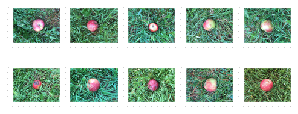

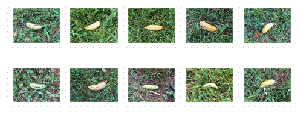

In [24]:
show_images(a_images);
show_images(b_images);

In [20]:
### BEGIN SOLUTION
get_elongation(crop_image(a_images[0]))
### END SOLUTION

1.0544648037543882

In [26]:
### BEGIN SOLUTION
get_elongation(crop_image(b_images[4]))
### END SOLUTION

1.8690337949834568

### Exercise: feature extraction
1. Write a function with a PIL image as input that returns `redness` and `elongation` as a list. You will use the following template:

In [ ]:
def extract_features(img, verbose = True):
    '''Take a PIL image and return two features of the foreground: redness and elongation.'''
    ### BEGIN SOLUTION
    redness = get_redness(img)
    if verbose: print('redness={0:5.2f}'.format(redness))
    elongation = get_elongation(img)
    if verbose: print('elongation={0:5.2f}'.format(elongation))
    ### END SOLUTION
    return [redness, elongation]

2. Test your function on some images

Insert all the functions you have implemented above in `code/my_utilities.py`.